## Lab-5
#### 1)

In [8]:
# Kütüphanelerin eklenmesi
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

1.247529411764706


<IPython.core.display.Javascript object>


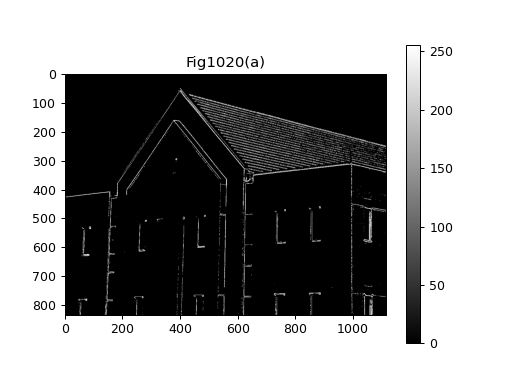

0.6021270588235295


<IPython.core.display.Javascript object>


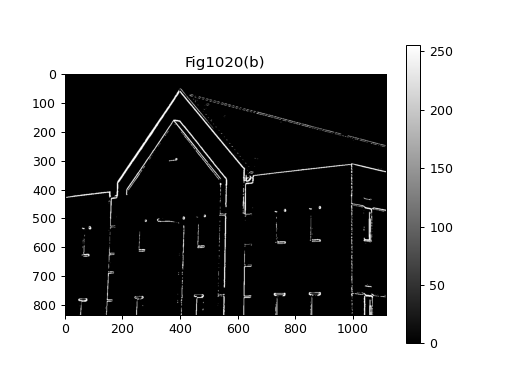

In [9]:
original_img = cv.imread("Fig1016(a)(building_original).pgm", 0) # Görüntünün okunması 
out = cv.normalize(original_img.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) # Görüntünün normalize edilemsi

sobelx = cv.Sobel(out, -1, 0, 1, ksize = 3) # x yönü sobel alınması
sobely = cv.Sobel(out, -1, 1, 0, ksize = 3) # y yönü sobel alınması

sobel = abs(sobelx) + abs(sobely) # x yönü sobel ile y yönü sobelin abslarının toplanması

T = np.amax(sobel) * 0.33 # Sobelin max değerinin %33' ünün T değerine atılması 
print(T) # T değerinin görüntülenmesi

sobel[sobel >= T] = 255 # T değerinden büyük değerler için 255 değeri atanması
sobel[sobel <  T] = 0   # T değerinden küçük değerler için 0 değeri atanması

# Görüntünün çizdirilemesi
%matplotlib notebook
plt.figure()
plt.imshow(sobel, cmap = "gray")
plt.title("Fig1020(a)")
plt.colorbar()

smoothed_img = cv.blur(out, (5, 5)) # Görüntüyü yumuşatma

sobelx = cv.Sobel(smoothed_img, -1, 0, 1, ksize = 3) # x yönü sobel alınması
sobely = cv.Sobel(smoothed_img, -1, 1, 0, ksize = 3) # y yönü sobel alınması

sobel = abs(sobelx) + abs(sobely) # x yönü sobel ile y yönü sobelin abslarının toplanması

T = np.amax(sobel) * 0.33 # Sobelin max değerinin %33' ünün T değerine atılması
print(T) # T değerinin görüntülenmesi

sobel[sobel >= T] = 255 # T değerinden büyük değerler için 255 değeri atanması
sobel[sobel <  T] = 0   # T değerinden küçük değerler için 0 değeri atanması

# Görüntünün çizdirilemesi
plt.figure()
plt.imshow(sobel, cmap = "gray")
plt.title("Fig1020(b)")
plt.colorbar()

### 10.16(d) görüntüsüne Otsu eşikleme yöntemi uygulama

<IPython.core.display.Javascript object>


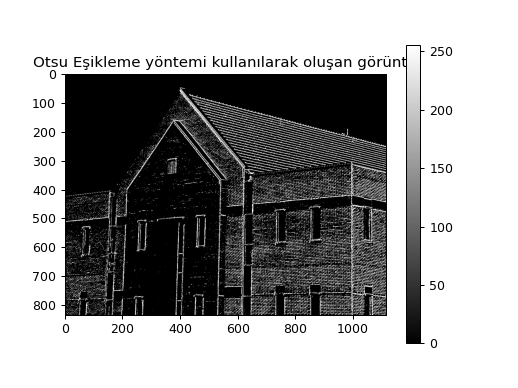

In [10]:
original_img = cv.imread("Fig1016(a)(building_original).pgm", 0) # Görüntünün okunması 

sobelx = cv.Sobel(original_img, -1, 0, 1, ksize = 3) # x yönü sobel alınması
sobely = cv.Sobel(original_img, -1, 1, 0, ksize = 3) # y yönü sobel alınması

sobel = abs(sobelx) + abs(sobely) # x yönü sobel ile y yönü sobelin abslarının toplanması

(rows,cols) = sobel.shape # rows ve cols'ların değerlerinin bulunması
image_size = sobel.size # Görüntünün boyutunun bir değişkene atanması
h = np.zeros(256) # h dizisi'inin tüm değerlerine 0 atanması
p = np.zeros(256) # p dizisi'inin tüm değerlerine 0 atanması
B = np.zeros(256) # B dizisi'inin tüm değerlerine 0 atanması
maximum = 0 # "Between-class variance"'ın maximumunu bulmak için kullanılacak maximum değişkenine 0 atanması
value = 0 # Between-class variance"'ın maximum değerindeki t değişkenini bulmak için kullanılacak value değişkenine 0 atanması

for i in range(rows):
    for j in range(cols):
        h[int(sobel[i, j])] = h[int(sobel[i, j])] + 1 # h[] dizisi ile hangi pikselden kaç tane olduğunun bulunması
        
for i in range(256):
    p[i] = h[i]/image_size # h[] dizisinin her bir elemanının resim boyutuna bölünerek p[] disinin bulunması 
    
for t in range(1, 256):

    q1 = sum(p[:t]) # p[]'nin t kısmına kadarki toplamı
    q2 = sum(p[t+1:]) # p[]'nin t+1 den 255'e kadar olan kısmı
    
    m1 = 0 # m1 değerinin bir sonraki for döngüsünde 0'lanması için m1'e 0 değerinin atanması
    m2 = 0 # m2 değerinin bir sonraki for döngüsünde 0'lanması için m2'ye 0 değerinin atanması
    
    # m1 değerinin bulunması
    for t1 in range(1, t+1):
        if(q1 != 0):
            m1 += t1*(p[t1]/q1)
    
    # m2 değerinin bulunması
    for t2 in range(t+1, 256):
        if(q2 != 0):
            m2 += t2*(p[t2]/q2)
    
    # "Between-class variance" denkleminin herbir t değeri için B[] dizisine atılması 
    B[t] = q1*q2*((m1-m2)**2)

# "Between-class variance"'ı maximum yapan değeri bulma    
for t in range(1, 256):
    if (B[t] > maximum):
        value = t
        maximum = B[t]

T = value # "Between-class variance"'ı maximum yapan değerin T' ye atanması

sobel[sobel >= T] = 255 # T değerinden büyük değerler için 255 değeri atanması
sobel[sobel <  T] = 0   # T değerinden küçük değerler için 0 değeri atanması

# Görüntünün çizdirilemesi
%matplotlib notebook
plt.figure()
plt.imshow(sobel, cmap = "gray")
plt.title("Otsu Eşikleme yöntemi kullanılarak oluşan görüntü")
plt.colorbar()

### 2)

### Fig1050(b)

<IPython.core.display.Javascript object>


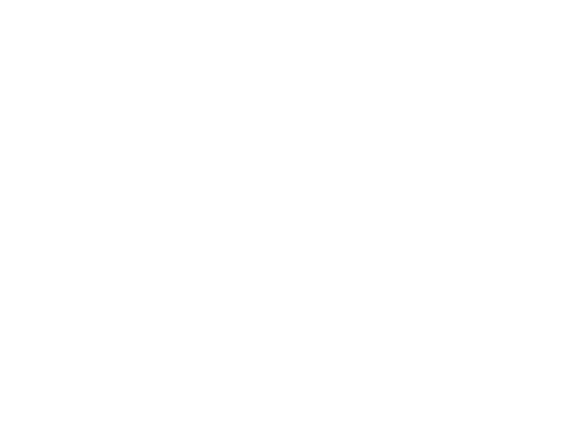

In [11]:
original_img = cv.imread("Fig1050asine_shaded_text_image.pgm", 0) # Görüntünün okunması 

(rows,cols) = original_img.shape # rows ve cols'ların değerlerinin bulunması
image_size = original_img.size # Görüntünün boyutunun bir değişkene atanması
h = np.zeros(256) # h dizisi'inin tüm değerlerine 0 atanması
p = np.zeros(256) # p dizisi'inin tüm değerlerine 0 atanması
B = np.zeros(256) # B dizisi'inin tüm değerlerine 0 atanması
maximum = 0 # "Between-class variance"'ın maximumunu bulmak için kullanılacak maximum değişkenine 0 atanması
value = 0 # Between-class variance"'ın maximum değerindeki t değişkenini bulmak için kullanılacak value değişkenine 0 atanması

for i in range(rows):
    for j in range(cols):
        h[int(original_img[i, j])] = h[int(original_img[i, j])] + 1 # h[] dizisi ile hangi pikselden kaç tane olduğunun bulunması
        
for i in range(256):
    p[i] = h[i]/image_size # h[] dizisinin her bir elemanının resim boyutuna bölünerek p[] disinin bulunması 
    
for t in range(1, 256):

    q1 = sum(p[:t]) # p[]'nin t kısmına kadarki toplamı
    q2 = sum(p[t:]) # p[]'nin t+1 den 255'e kadar olan kısmı
    
    # m1 değerinin bulunması
    for t1 in range(1, t+1):
        if(q1 != 0):
            m1 += t1*(p[t1]/q1)
    
    # m2 değerinin bulunması
    for t2 in range(t+1, 256):
        if(q2 != 0):
            m2 += t2*(p[t2]/q2)
    
    # "Between-class variance" denkleminin herbir t değeri için B[] dizisine atılması 
    B[t] = q1*q2*((m1-m2)**2)

    m1 = 0 # m1 değerinin bir sonraki for döngüsünde 0'lanması için m1'e 0 değerinin atanması
    m2 = 0 # m2 değerinin bir sonraki for döngüsünde 0'lanması için m2'ye 0 değerinin atanması

# "Between-class variance"'ı maximum yapan değeri bulma    
for t in range(1, 256):
    if (B[t] > maximum):
        value = t
        maximum = B[t]

T = value # "Between-class variance"'ı maximum yapan değerin T' ye atanması

original_img[original_img >= T] = 255 # T değerinden büyük değerler için 255 değeri atanması
original_img[original_img <  T] = 0   # T değerinden küçük değerler için 0 değeri atanması

# Görüntünün çizdirilemesi
%matplotlib notebook
plt.figure()
plt.imshow(original_img, cmap = "gray")
plt.title("Fig1050(b)")
plt.colorbar()

### Fig1050(c)

<IPython.core.display.Javascript object>


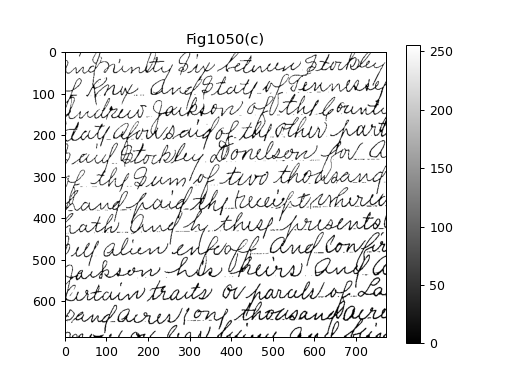

In [12]:
original_img = cv.imread("Fig1050asine_shaded_text_image.pgm", 0) # Görüntünün okunması 

(rows,cols) = original_img.shape # rows ve cols'ların değerlerinin bulunması
image_size = original_img.size # Görüntünün boyutunun bir değişkene atanması
h = np.zeros(256) # h dizisi'inin tüm değerlerine 0 atanması
p = np.zeros(256) # p dizisi'inin tüm değerlerine 0 atanması
B = np.zeros(256) # B dizisi'inin tüm değerlerine 0 atanması
maximum = 0 # "Between-class variance"'ın maximumunu bulmak için kullanılacak maximum değişkenine 0 atanması
value = 0 # Between-class variance"'ın maximum değerindeki t değişkenini bulmak için kullanılacak value değişkenine 0 atanması

for i in range(rows):
    for j in range(cols):
        h[int(sobel[i, j])] = h[int(sobel[i, j])] + 1 # h[] dizisi ile hangi pikselden kaç tane olduğunun bulunması
        
for i in range(256):
    p[i] = h[i]/image_size # h[] dizisinin her bir elemanının resim boyutuna bölünerek p[] disinin bulunması 
    
for t in range(1, 256):

    q1 = sum(p[:t]) # p[]'nin t kısmına kadarki toplamı
    q2 = sum(p[t:]) # p[]'nin t+1 den 255'e kadar olan kısmı
    
    m1 = 0 # m1 değerinin bir sonraki for döngüsünde 0'lanması için m1'e 0 değerinin atanması
    m2 = 0 # m2 değerinin bir sonraki for döngüsünde 0'lanması için m2'ye 0 değerinin atanması
    
    # m1 değerinin bulunması
    for t1 in range(1, t+1):
        if(q1 != 0):
            m1 += t1*(p[t1]/q1)
    
    # m2 değerinin bulunması
    for t2 in range(t+1, 256):
        if(q2 != 0):
            m2 += t2*(p[t2]/q2)
    
    # "Between-class variance" denkleminin herbir t değeri için B[] dizisine atılması 
    B[t] = q1*q2*((m1-m2)**2)

# "Between-class variance"'ı maximum yapan değeri bulma    
for t in range(1, 256):
    if (B[t] > maximum):
        value = t
        maximum = B[t]

T = value # "Between-class variance"'ı maximum yapan değerin T' ye atanması

original_img[original_img >= T] = 255 # T değerinden büyük değerler için 255 değeri atanması
original_img[original_img <  T] = 0   # T değerinden küçük değerler için 0 değeri atanması

# Görüntünün çizdirilemesi
%matplotlib notebook
plt.figure()
plt.imshow(original_img, cmap = "gray")
plt.title("Fig1050(c)")
plt.colorbar()